In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

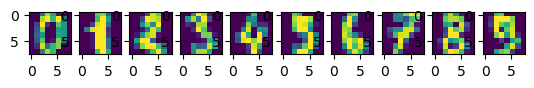

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [4]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.638442521631644


In [5]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.9111111111111111
0.8222222222222222
0.8222222222222222
0.8888888888888888
0.8222222222222222
0.8333333333333334
0.8444444444444444
0.8666666666666667
0.8777777777777778
0.8777777777777778
0.8555555555555555
0.8777777777777778
0.8222222222222222
0.9
0.8666666666666667
0.8888888888888888
0.8555555555555555
0.8666666666666667
0.8555555555555555
0.7777777777777778
0.8666666666666667
0.8444444444444444
0.8444444444444444
0.8666666666666667
0.8555555555555555
0.8555555555555555
0.8333333333333334
0.8666666666666667
0.8555555555555555
0.8777777777777778
0.8555555555555555
0.8666666666666667
0.8444444444444444
0.9111111111111111
0.9222222222222223
0.9
0.8333333333333334
0.8111111111111111
0.8
0.8444444444444444
0.8777777777777778
0.8111111111111111
0.8666666666666667
0.9111111111111111
0.9222222222222223
0.8666666666666667
0.8888888888888888
0.7888888888888889
0.8555555555555555
0.8666666666666667
0.9111111111111111
0.7777777777777778
0.8777777777777778
0.8666666666666667
0.9
0.8333333333333

In [19]:
# Classifieur Bagging:

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

# apprentissage et l’évaluation de cet ensemble:

clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

# Calcule de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test:

N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.852111111111111 0.03700834073490213


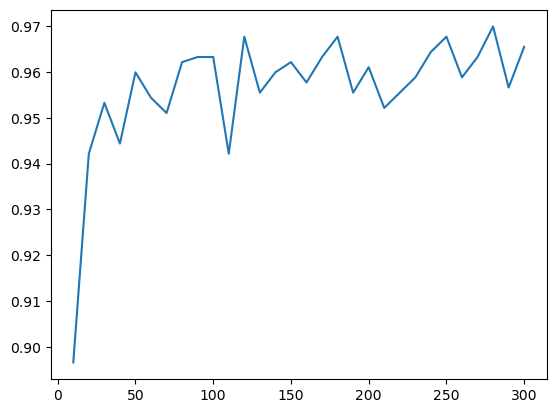

In [21]:
# Construire le graphique accuracy vs n_estimators. Que constatez-vous :
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()


#Le taux d’erreur diminue avec n_estimators, mais à partir d’une valeur il se stabilise, donc on ne gagne rien à partir de cette valeur de n_estimators, si ce n’est que l’algorithme devient plus lent

In [28]:
# GridSearchCV:


digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9254727474972191
max_samples: 0.8
max_features: 0.8


# Forêts aléatoires

In [29]:
# on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test: 

digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [33]:
# créer et entraîner notre modèle:


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200)

In [34]:
# Réaliser les prédictions et calculer le score de test:

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)


0.9091470951792336


In [35]:
# Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas):

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.7132262051915945
Bagging (200 arbres) : 0.8974042027194067
Forêt aléatoire (200 arbres) : 0.9066749072929543


In [36]:
# Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging):

N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

# Nous avons donc non seulement un plus faible taux moyen d’erreurs, mais aussi une variance plus faible.

0.9331479421579534 0.010284850111869902
0.9595105672969966 0.007056174205630111


10 0.92880978865406
20 0.9454949944382648
30 0.9532814238042269
40 0.9621802002224694
50 0.9655172413793104
60 0.9621802002224694
70 0.9655172413793104
80 0.9655172413793104
90 0.9621802002224694
100 0.9666295884315906
110 0.9655172413793104
120 0.96440489432703
130 0.96440489432703
140 0.9655172413793104
150 0.9666295884315906
160 0.96440489432703
170 0.9666295884315906
180 0.9699666295884316
190 0.9655172413793104
200 0.96440489432703
210 0.9666295884315906
220 0.967741935483871
230 0.9666295884315906
240 0.96440489432703
250 0.9666295884315906
260 0.9666295884315906
270 0.9632925472747497
280 0.9666295884315906
290 0.9666295884315906
300 0.9655172413793104


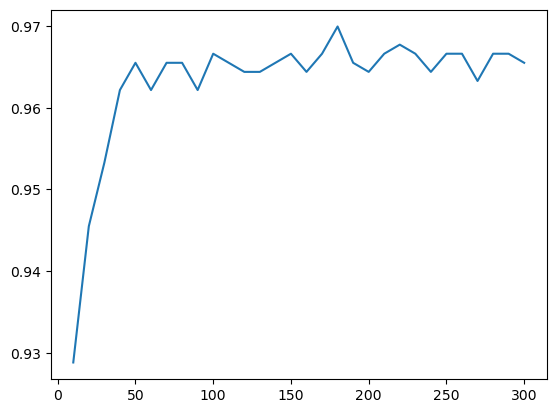

In [37]:
# Construire le graphique accuracy vs n_estimators: 
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()


In [38]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9588431590656284
Extra Trees : 0.9744160177975528


In [39]:
# refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier:

from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

C:\Users\hlakh\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8788627935723115


# Workshop 2 : 

In [44]:
# Importer les libraries:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [45]:
# Création d'une variable:

acc_scorer = make_scorer(accuracy_score)

In [46]:
# Afficher le dataset:

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df.dropna(subset = ['Age'], inplace = True)
df.Age = df.Age.astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [53]:
# Transformation de la variable sex:

df.Sex = df.Sex.map({'male' : 0, 'female': 1})

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [55]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 134, dtype: int64

In [56]:
# Premier tri:

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [58]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, '%Survie')

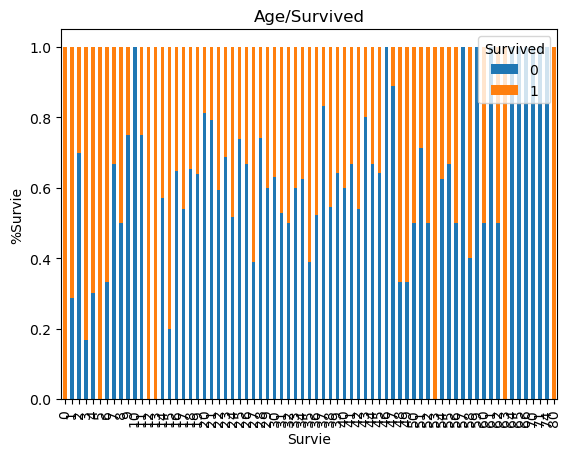

In [61]:
# Influence de l'age sur la survie:

import matplotlib.pyplot as plt
table = pd.crosstab(df.Age, df.Survived)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title ('Age/Survived')
plt.xlabel('Survie')
plt.ylabel('%Survie')

In [62]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


In [ ]:
df.loc[df['Age'] <= 16 , 'Age'] = 0 
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[df['Age'] > 64 , 'Age'] = 4
df.drop(['AgeBand'])